In [1]:
from knn import KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import utils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('training.csv')
X_train = df_train.values[:, 0:2].astype(float)  # I want all rows but only the first two cols
y_train = df_train.values[:, -1] # all rows, last col
# X.shape, y.shape  # (2800, 2) : NxD, (2800, ) : Nx1

In [3]:
df_valid = pd.read_csv('validation.csv')
X_val = df_valid.values[:, 0:2]
y_val = df_valid.values[:, -1]
X_val.shape, y_val.shape

((480, 2), (480,))

In [4]:
# I use the validation set to tune the hyperparameters (k)
accuracies = []
k_values = list(range(1, 30, 2))  # usually odd values of k are preferred 
p_values = list(range(1, 7))
best_acc = 0.0
for k in k_values:
    for p in p_values:
        knn_model = KNN(k)
        knn_model.train(X_train, y_train)
        y_pred = knn_model.predict(X_val, p)
        acc = accuracy_score(y_val, y_pred)
        accuracies.append(acc)
        # print(f"accuracy is {acc} with k={k}")
        if acc > best_acc:
            best_acc = acc
            best_k = k
            best_p = p
print(f"Validation accuracy: {best_acc}, k={best_k}, p={best_p}")

Validation accuracy: 0.8270833333333333, k=23, p=5


In [10]:
# Create a grid of testing points
h=0.02 # space in the grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
# xx is the x-axis coordinate of the points in the test set
# yy is the y-axis coordinate of the points in the test set
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# X_test contains the test set inputs (xx,yy)
X_test = np.c_[xx.ravel(), yy.ravel()]

In [11]:
knn3_model = KNN(3)
knn3_model.train(X_train, y_train)
y_test_k3 = knn3_model.predict(X_test, 2).reshape(xx.shape)

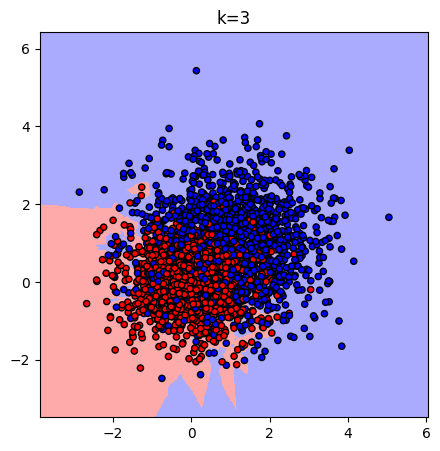

In [12]:
k = 3
utils.plot_results(xx, yy, X_train, y_train, y_test_k3, "k=" + str(k))

In [8]:
import seaborn as sns

sns.scatterplot(
    x=X_val[:, 0],
    y=X_val[:, 1],
    hue=y_test_k3,
    alpha=1.0,
    edgecolor="black",
 )
plt.title("KNN with k=3")
plt.show()

ValueError: Per-column arrays must each be 1-dimensional

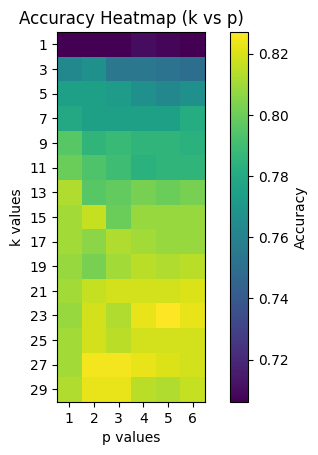

In [ ]:
accuracies = np.array(accuracies).reshape(len(k_values), len(p_values))

plt.imshow(accuracies, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Accuracy')
plt.xlabel('p values')
plt.ylabel('k values')
plt.xticks(np.arange(len(p_values)), p_values)
plt.yticks(np.arange(len(k_values)), k_values)
plt.title('Accuracy Heatmap (k vs p)')
plt.show()